In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
# load the dataset
df = pd.read_csv('houseDatasetForProject.csv')

# show first few rows
print(df.head())


   bedroom_count    net_sqm  center_distance  metro_distance  floor  age  \
0              1  26.184098          1286.68      204.003817     22   67   
1              1  34.866901          1855.25      186.980360      8   30   
2              1  36.980709           692.09      111.224999     24   24   
3              1  17.445723          1399.49      237.998760      1   66   
4              1  52.587646            84.65      100.996399     20    3   

        price  
0  $96,004.80  
1  $92,473.72  
2  $98,112.52  
3  $92,118.33  
4  $98,976.65  


In [11]:
# handles missing values
df.fillna(df.median(), inplace=True)

# convert categorical columns
df = pd.get_dummies(df, drop_first=True)

# drop any unnecessary columns if needed like ID columns
# df = df.drop(['Id'], axis=1)

# show data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB
None


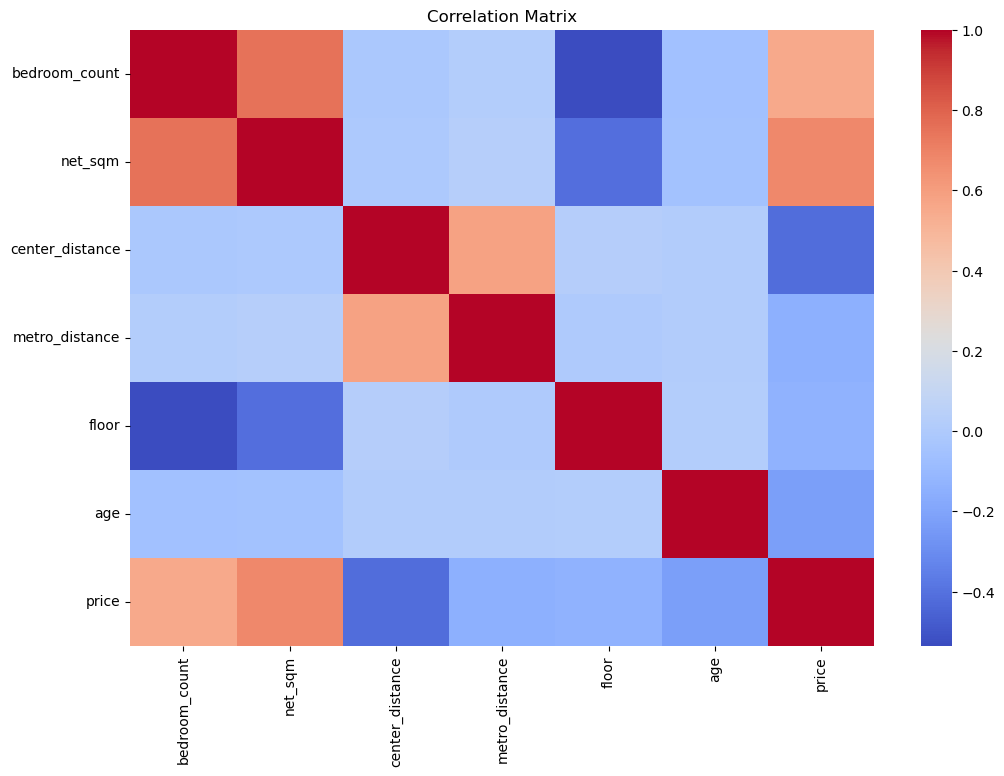

In [23]:
# correlation matrix for understanding relationships
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\jared\anaconda_stuff\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


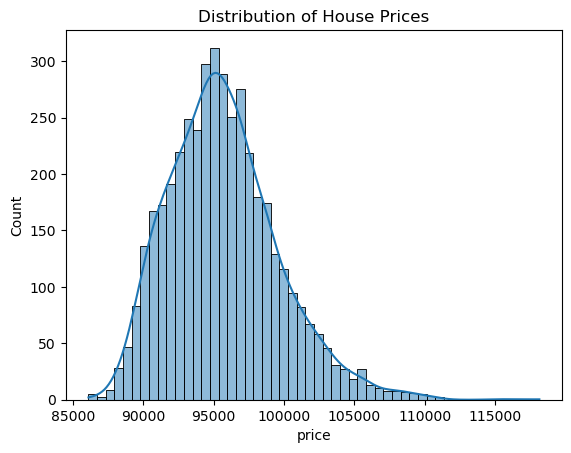

In [24]:
# distribution of the target variable; price
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [14]:
# feats and target variable
X = df.drop('price', axis=1)
y = df['price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print training and testing set
print(f'Training data size: {X_train.shape}')
print(f'Test data size: {X_test.shape}')


Training data size: (3446, 6)
Test data size: (862, 6)


In [17]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}')

Linear Regression MAE: 1482.3529507867026
Linear Regression RMSE: 2007.1817766188924


In [18]:
# decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f'Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt)}')
print(f'Decision Tree RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}')

Decision Tree MAE: 2282.222900232018
Decision Tree RMSE: 3180.6124418430736


In [20]:
# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f'Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}')

Random Forest MAE: 1588.8076853828295
Random Forest RMSE: 2117.4971653855546


               Model          MAE         RMSE
0  Linear Regression  1482.352951  2007.181777
1      Decision Tree  2282.222900  3180.612442
2      Random Forest  1588.807685  2117.497165


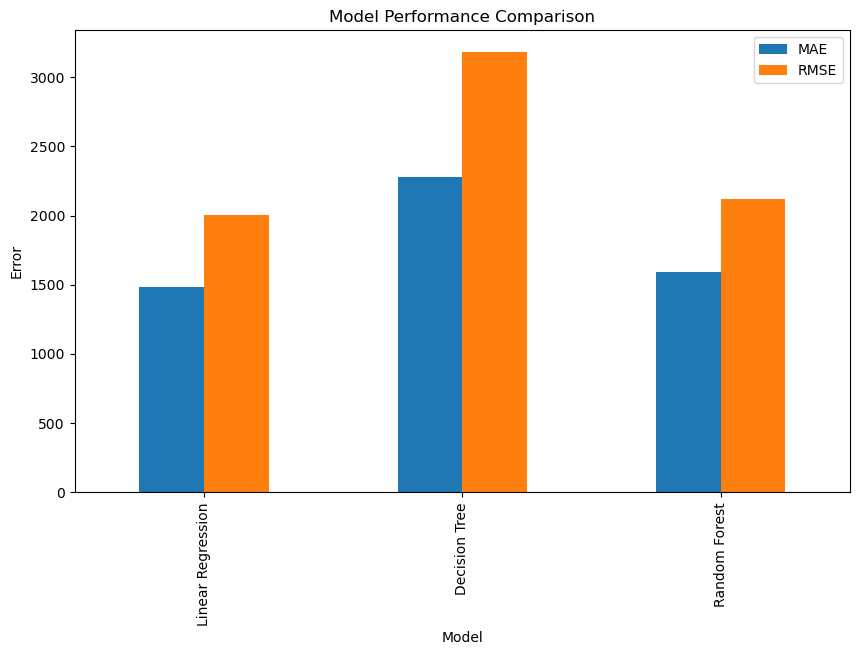

In [26]:
# model performance
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae = [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_dt), 
       mean_absolute_error(y_test, y_pred_rf)]
rmse = [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_dt)), 
        np.sqrt(mean_squared_error(y_test, y_pred_rf))]

model_eval = pd.DataFrame({'Model': models, 'MAE': mae, 'RMSE': rmse})
print(model_eval)

# visualize the performance
model_eval.set_index('Model').plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.show()
